# Summer Olympic Games, Medal Tables 1896-2012

The main goal of this project is the aggregation and cleaning of the Summer Olympic dataset in order to produce an accurate medal table that reflects the total number of gold, silver, and bronze medals awarded to each country for an individual event.  The largest hurdle in compiling the medal table is identifying and differentiating medals awarded to individuals in team events and single events. Medals awareded to individuals in team events only count as one medal. The US Basketball team won the gold medal in 2012 and 12 gold medals were awarded to athletes, but only one gold medal counts toward the total number of medals earned.

In order to accurately generate medal tables from the raw data, we must examine the ruling conventions set out by the International Olympics Committee (IOC).  

All events with less than or equal to five medals are deemed __Single Events__, all events with more than five medals are __Team Events__. In the event that two or three athletes share a bronze medal in a single event, all of these medals count toward the medal totals. 

## Aggregating and Cleaning the Data

#### Naive Approach

In this approach, we can illustrate the need to differentiate between team and single events when counting medal totals.

We perform a simple groupby for the year 1976 on our unclean data and compare it to the published table.

In [743]:
import pandas as pd
import matplotlib.pyplot as plt

In [744]:
summer = pd.read_csv("summer.csv")

In [745]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [5]:
summer76 = summer.loc[summer.Year == 1976]

In [6]:
summer76.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
13900,1976,Montreal,Aquatics,Diving,"ALEINIK, Vladimir",URS,Men,10M Platform,Bronze
13901,1976,Montreal,Aquatics,Diving,"DIBIASI, Klaus",ITA,Men,10M Platform,Gold
13902,1976,Montreal,Aquatics,Diving,"LOUGANIS, Gregory",USA,Men,10M Platform,Silver
13903,1976,Montreal,Aquatics,Diving,"WILSON, Deborah Keplar",USA,Women,10M Platform,Bronze
13904,1976,Montreal,Aquatics,Diving,"VAYTSEKHOVSKAYA, Elena",URS,Women,10M Platform,Gold


In [7]:
mt76 = summer76.groupby(["Country", "Medal"]).Medal.count().unstack(fill_value = 0)
mt76.head()

Medal,Bronze,Gold,Silver
Country,,,
AUS,8,0,16
AUT,1,0,0
BEL,6,0,3
BER,1,0,0
BRA,3,0,0


In [8]:
mt76 = mt76.sort_values(["Gold", "Silver", "Bronze"], ascending = False)[["Gold", "Silver", "Bronze"]]
mt76.head(10)

Medal,Gold,Silver,Bronze
Country,,,
URS,113,93,79
GDR,99,51,42
USA,63,56,36
JPN,25,6,10
FRG,21,24,30
POL,18,29,26
NZL,17,1,9
HUN,14,6,35
SWE,9,1,0


Comparing `mt76` to the published Olympic medal table from 1976, `summer_76`, shows that the absolute divergence between the two is very high.

In [460]:
summer_76 = pd.read_csv("wik_1976.csv")
summer_76

,Rank,NOC,Gold,Silver,Bronze,Total
0,1,Soviet Union (URS),49,41,35,125
1,2,East Germany (GDR),40,25,25,90
2,3,United States (USA),34,35,25,94
3,4,West Germany (FRG),10,12,17,39
4,5,Japan (JPN),9,6,10,25
5,6,Poland (POL),7,6,13,26
6,7,Bulgaria (BUL),6,9,7,22
7,8,Cuba (CUB),6,4,3,13
8,9,Romania (ROU),4,9,14,27
9,10,Hungary (HUN),4,5,13,22


--------------

## Identifying Mixed Events

In [10]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In order to separate the events and differentiate between events of the same name, a separate column denoting whether the event is a __Men__, __Women__, or __Mixed__ must be created.

The default value for this column will be the gender of the athlete. A full copy of the `Gender` column is assigned to the label `Event_gender`. 

In [33]:
summer["Event_gender"] = summer.Gender

__Identifying Mixed Events__

The `Event_gender` column is then modified to note which events are mixed gender based on the following criteria:

    Events marked as "Mixed" or "Pairs" are mixed events. 
    
    The "Equestrian" sport is a mixed event. 
    
    All "Sailing" events before 1988 are mixed events. (Up to and including the gear 1984)

    Mixed Badminton doubles as an event started in the 1996 summer Olympics, however the data does not differentiate between normal doubles and mixed doubles. Data from another source is used to differentate between the two event types.[1]

In [360]:
summer.loc[summer.Event.str.contains('Mixed'), "Event_gender"] = "Mixed"

In [361]:
summer.loc[summer.Event.str.contains('Pairs'), "Event_gender"] = "Mixed"

In [362]:
summer.loc[summer.Sport.str.contains('Equestrian'), "Event_gender"] = "Mixed"

In [363]:
summer.loc[summer.Sport.str.contains('Sailing') & (summer.Year < 1988), "Event_gender"] = "Mixed"

In [364]:
summer.loc[[21773, 21782, 21776, 21785, 21770, 21779, 23703, 23712, 23706, 23715, 23709, 
            23700, 25720, 25729, 25723, 25732, 25726, 25717, 27727, 27736, 27730, 27739, 
            27724, 27733, 29784, 29785, 29786, 29787, 29788, 29789], "Event_gender"] = "Mixed"

We then create a boolean DataFrame `filter_medals` with a value for each unique medal instance. Each unique combination of Year, Country, Sport, Discipline, Event, Event_gender, and Medal creates a unique medal event that can then be be manipulated for further analysis. 

In [493]:
filter_medals = summer.groupby(["Year", "Country", "Sport", "Discipline", "Event",
                                "Event_gender", "Medal"]).Medal.any().unstack(fill_value=False)
filter_medals = filter_medals[["Gold", "Silver", "Bronze"]]
filter_medals

Medal                                                                     Gold  \
Year Country Sport     Discipline          Event           Event_gender          
1896 AUS     Athletics Athletics           1500M           Men            True   
                                           800M            Men            True   
     AUT     Aquatics  Swimming            100M Freestyle  Men           False   
                                           400M Freestyle  Men            True   
             Cycling   Cycling Track       10KM            Men           False   
...                                                                        ...   
2012 USA     Wrestling Wrestling Freestyle Wf 96 KG        Men            True   
     UZB     Boxing    Boxing              69 - 75 KG      Men           False   
             Judo      Judo                - 60 KG         Men           False   
             Wrestling Wrestling Freestyle Wf 120KG        Men            True   
     VEN     Fencing   Fencing             Épée Individual Men            True   

Medal                                                                    Silver  \
Year Country Sport     Discipline          Event           Event_gender           
1896 AUS     Athletics Athletics           1500M           Men            False   
                                           800M            Men            False   
     AUT     Aquatics  Swimming            100M Freestyle  Men             True   
                                           400M Freestyle  Men            False   
             Cycling   Cycling Track       10KM            Men            False   
...                                                                         ...   
2012 USA     Wrestling Wrestling Freestyle Wf 96 KG        Men            False   
     UZB     Boxing    Boxing              69 - 75 KG      Men            False   
             Judo      Judo                - 60 KG         Men            False   
             Wrestling Wrestling Freestyle Wf 120KG        Men            False   
     VEN     Fencing   Fencing             Épée Individual Men            False   

Medal                                                                    Bronze  
Year Country Sport     Discipline          Event           Event_gender          
1896 AUS     Athletics Athletics           1500M           Men            False  
                                           800M            Men            False  
     AUT     Aquatics  Swimming            100M Freestyle  Men            False  
                                           400M Freestyle  Men            False  
             Cycling   Cycling Track       10KM            Men             True  
...                                                                         ...  
2012 USA     Wrestling Wrestling Freestyle Wf 96 KG        Men            False  
     UZB     Boxing    Boxing              69 - 75 KG      Men             True  
             Judo      Judo                - 60 KG         Men             True  
             Wrestling Wrestling Freestyle Wf 120KG        Men            False  
     VEN     Fencing   Fencing             Épée Individual Men            False  

[12979 rows x 3 columns]

In [746]:
filter_medals.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 12979 entries, (1896, 'AUS', 'Athletics', 'Athletics', '1500M', 'Men') to (2012, 'VEN', 'Fencing', 'Fencing', 'Épée Individual', 'Men')
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Gold    12979 non-null  bool 
 1   Silver  12979 non-null  bool 
 2   Bronze  12979 non-null  bool 
dtypes: bool(3)
memory usage: 152.3+ KB


__Creating and sorting the sum of all medals based on `Year` and `Country`__

In [536]:
medal_table = filter_medals.groupby(["Year", "Country"]).sum().sort_values([
    "Year", "Gold", "Silver", "Bronze"], ascending=[True, False, False, False])

In [537]:
medal_table["Total"] = medal_table.sum(axis=1)

In [538]:
medal_table

Medal         Gold  Silver  Bronze  Total
Year Country                             
1896 USA        11       6       2     19
     GRE        10      17      18     45
     GER         6       5       2     13
     FRA         5       4       2     11
     GBR         2       3       2      7
...            ...     ...     ...    ...
2012 HKG         0       0       1      1
     KSA         0       0       1      1
     KUW         0       0       1      1
     MAR         0       0       1      1
     TJK         0       0       1      1

[1157 rows x 4 columns]

Comparing the generated medal table for the 1976 Olympics to the official published medal table shows they are identical.

In [497]:
medal_table.loc[1976] == summer_76.iloc[:-1, 2:].values

Medal,Gold,Silver,Bronze,Total
Country,,,,
URS,True,True,True,True
GDR,True,True,True,True
USA,True,True,True,True
FRG,True,True,True,True
JPN,True,True,True,True
POL,True,True,True,True
BUL,True,True,True,True
CUB,True,True,True,True
ROU,True,True,True,True


In [499]:
total_medals = filter_medals.groupby(["Country"]).sum().sort_values([
    "Gold", "Silver", "Bronze"], ascending=False)
total_medals

Medal,Gold,Silver,Bronze
Country,,,
USA,972,755,662
URS,394,317,294
GBR,236,271,267
FRA,201,216,240
CHN,201,148,126
...,...,...,...
IRQ,0,0,1
MKD,0,0,1
MRI,0,0,1


## Visualizing the Data

Medals per year for top 5 countries overall vs total medals awarded per year


Top 5 countries are: USA, URS, GBR, FRA, CHN

In [663]:
import seaborn as sns
sns.set_theme(font_scale=1.5)

In [684]:
top5 = medal_table.swaplevel().loc[['USA', 'URS', 'GBR', 'FRA', 'CHN']]
top5.head()

Medal         Gold  Silver  Bronze  Total
Country Year                             
USA     1896    11       6       2     19
        1900    19      14      14     47
        1904    77      82      74    233
        1908    22      12      12     46
        1912    25      18      19     62

In [686]:
top5 = top5.reset_index()

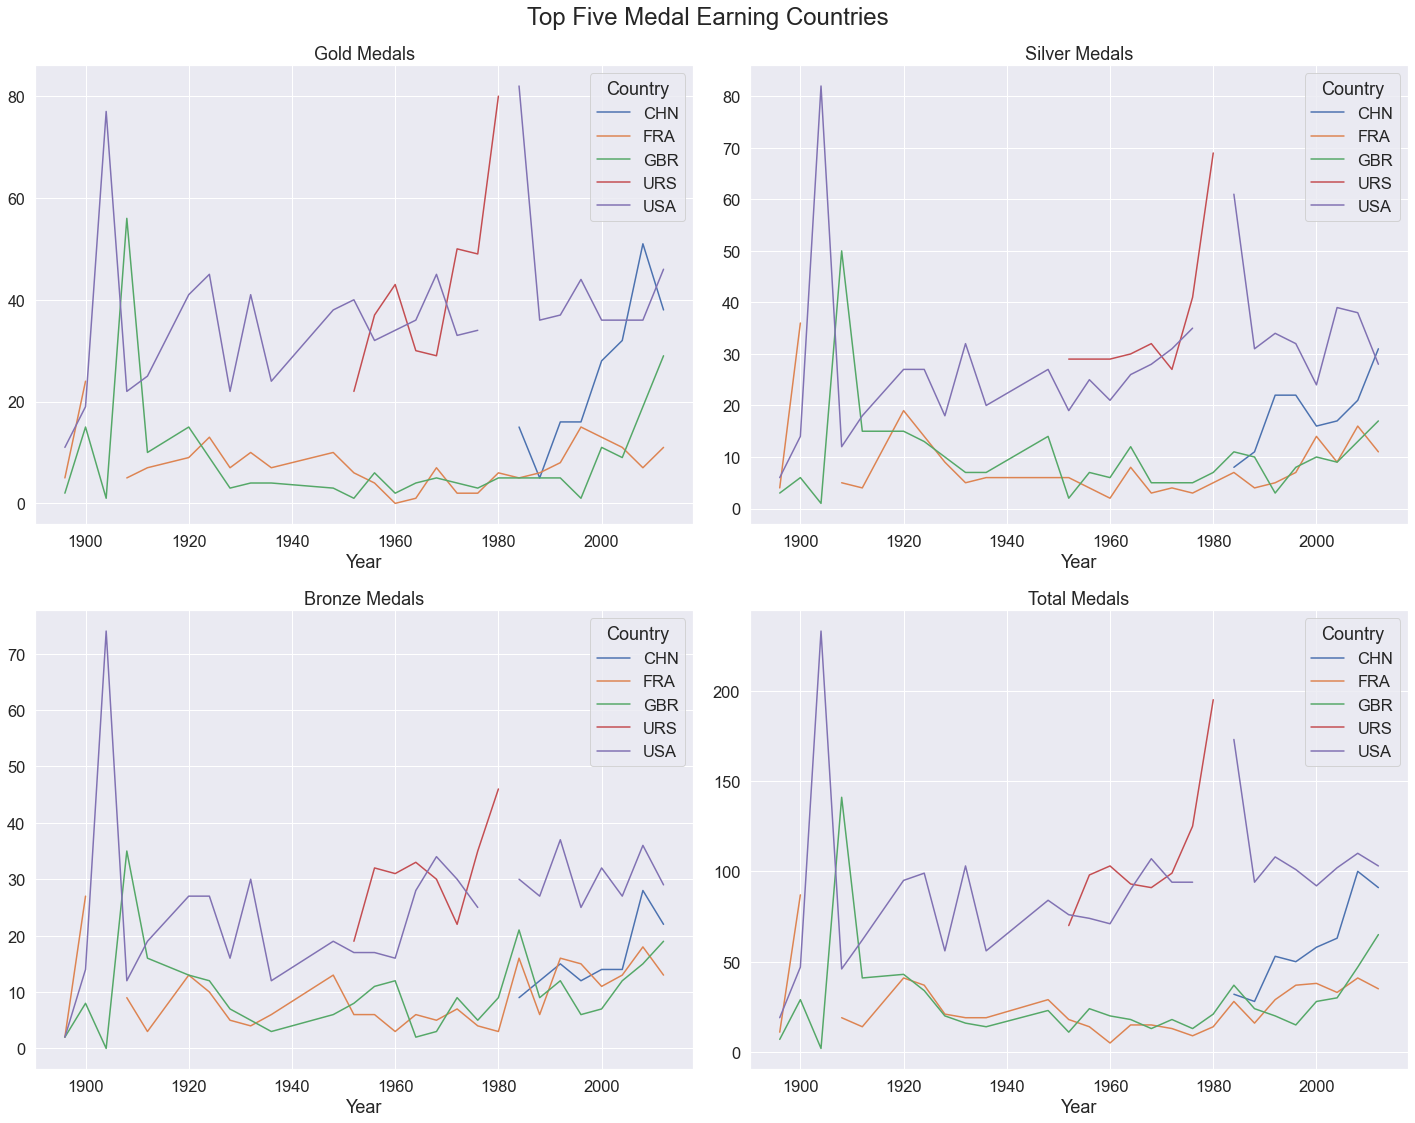

In [740]:
top5.reset_index()
f, a = plt.subplots(nrows=2, ncols=2, figsize=(20, 16), tight_layout=True)
f.suptitle('Top Five Medal Earning Countries', fontsize=24)
plt.grid()
top5.pivot('Year', 'Country', 'Gold').plot(ax=a[0, 0], title='Gold Medals', fontsize=16)
top5.pivot('Year', 'Country', 'Silver').plot(ax=a[0, 1], title='Silver Medals')
top5.pivot('Year', 'Country', 'Bronze').plot(ax=a[1, 0], title='Bronze Medals')
top5.pivot('Year', 'Country', 'Total').plot(ax=a[1, 1], title='Total Medals')
plt.show()

This visualization shows outliers in the early Olympics. The 1904 Olympics took place in St. Louis, Missouri, the first of the modern Olympic games to take place outside of Europe. Due to the limited availability of travel methods at that time, few top performing athletes outside of the United States were able to attend.  The United States was able to take home a vast majority of the medals as a result. [2]

Great Britain was the host country in 1908 after relocation from Rome due to the eruption of Mt. Vesuivus in 1906. Great Britan won the vast majority of medals that year for similar reasons: travel of interational athletes was not very accessable. 

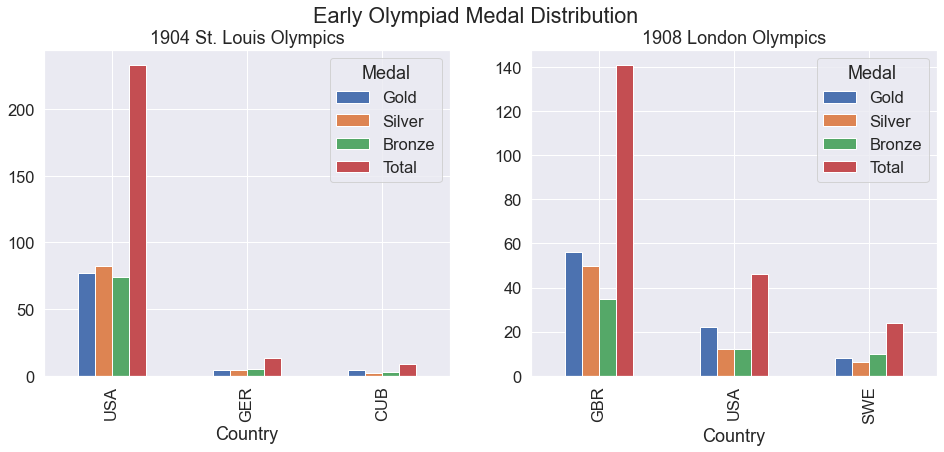

In [736]:
f, a = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
f.suptitle('Early Olympiad Medal Distribution')
medal_table.loc[1908].head(3).plot(ax=a[1], kind='bar', title='1908 London Olympics')
medal_table.loc[1904].head(3).plot(ax=a[0], kind='bar', title='1904 St. Louis Olympics')
plt.show()

In [742]:
medal_table.groupby("Year").sum().plot()

Medal,Gold,Silver,Bronze,Total
Year,,,,
1896,43,42,35,120
1900,84,84,77,245
1904,95,92,86,273
1908,109,106,100,315
1912,103,103,103,309
1920,155,146,134,435
1924,126,126,125,377
1928,110,108,109,327
1932,116,116,114,346


## Sources

Badminton mixed doubles:  https://olympics.sporting99.com/track-field/badminton-mixed-doubles.html

1904 games: https://olympics.com/en/olympic-games/st-louis-1904